In [97]:
import pandas as pd
import json
source = "heart-bpm.json"

In [98]:
with open(source, "r") as f:
    data = json.load(f)
print("minStartTimeNs", data["minStartTimeNs"])    
print("maxEndTimeNs", data["maxEndTimeNs"])
print("dataSourceId", data["dataSourceId"])
points = data["point"]

minStartTimeNs 1561953600000000000
maxEndTimeNs 1568087940000000000
dataSourceId derived:com.google.heart_rate.bpm:com.google.android.gms:merge_heart_rate_bpm


In [99]:
df = pd.DataFrame(points)
df.startTimeNanos = df.startTimeNanos.astype('int64')
df.endTimeNanos = df.endTimeNanos.astype('int64')
df.modifiedTimeMillis = df.modifiedTimeMillis.astype('int64')
df['startTimeNanos'] = pd.to_datetime(df['startTimeNanos'], unit='ns')
df['endTimeNanos'] = pd.to_datetime(df['endTimeNanos'], unit='ns')
df['modifiedTimeMillis'] = pd.to_datetime(df['modifiedTimeMillis'], unit='ms')
df['value'] = df['value'].apply(lambda x: x[0]["fpVal"])

In [100]:
df.iloc[0]

startTimeNanos                               2019-07-01 10:24:18.251000
endTimeNanos                                 2019-07-01 10:24:18.251000
dataTypeName                                  com.google.heart_rate.bpm
originDataSourceId    raw:com.google.heart_rate.bpm:Compal:Fossil Sp...
value                                                           119.455
modifiedTimeMillis                           2019-07-02 01:31:34.348000
Name: 0, dtype: object

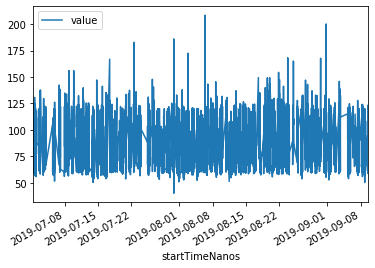

In [101]:
df.plot.line(y="value", x="startTimeNanos")